In [1]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
import 사용자행동인식데이터세트실습

In [3]:
x_train, x_test, y_train, y_test = 사용자행동인식데이터세트실습.get_human_dataset()

In [4]:
rf_clf = RandomForestClassifier(random_state=0, max_depth=8)
rf_clf.fit(x_train, y_train)
pred = rf_clf.predict(x_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9196


In [5]:
params = {'max_depth':[8,16,24],
            'min_samples_leaf': [1,6,12],
            'min_samples_split': [2,8,16]}

In [6]:
params = {'max_depth':[4,8,12,16,20],
            'min_samples_leaf': [1,4,10,15],
            'min_samples_split': [2,4,6,8]}

In [7]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(x_train, y_train)

print('최고 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/opt/anaconda3/envs/test/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/test/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/test/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/test/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686:

최고 하이퍼 파라미터:
 {'max_depth': 12, 'min_samples_leaf': 10, 'min_samples_split': 2}
최고 예측 정확도: 0.9183


In [8]:
model = grid_cv.best_estimator_

In [9]:
pred = model.predict(x_test)

In [10]:
print('acc: ', accuracy_score(y_test, pred))

acc:  0.9226331862911435


In [11]:
sd = pd.Series(model.feature_importances_)
sd.index = x_train.columns
sd

tBodyAcc-mean()-X                       0.000080
tBodyAcc-mean()-Y                       0.000157
tBodyAcc-mean()-Z                       0.000064
tBodyAcc-std()-X                        0.002301
tBodyAcc-std()-Y                        0.000162
                                          ...   
angle(tBodyGyroMean,gravityMean)        0.000254
angle(tBodyGyroJerkMean,gravityMean)    0.000305
angle(X,gravityMean)                    0.039668
angle(Y,gravityMean)                    0.028377
angle(Z,gravityMean)                    0.006582
Length: 561, dtype: float64

In [12]:
top20 = sd.sort_values(ascending=False)[:20]
top20

angle(X,gravityMean)               0.039668
tGravityAcc-min()-X                0.031758
tGravityAcc-mean()-Y               0.031369
angle(Y,gravityMean)               0.028377
tGravityAcc-min()-Y                0.027929
tGravityAcc-energy()-X             0.025650
tGravityAcc-max()-X                0.025006
tGravityAcc-mean()-X               0.022229
tGravityAcc-max()-Y                0.021489
fBodyAccJerk-bandsEnergy()-1,8     0.019433
tGravityAcc-energy()-Y             0.018717
tBodyAcc-max()-X                   0.015960
tBodyAccJerk-entropy()-X           0.014126
tGravityAcc-max()-Z                0.012117
tGravityAcc-arCoeff()-Z,3          0.011429
fBodyAccJerk-bandsEnergy()-1,16    0.010838
fBodyAcc-energy()-X                0.010618
fBodyAccMag-std()                  0.009690
tGravityAcc-arCoeff()-Y,1          0.009632
fBodyAccJerk-mean()-X              0.009529
dtype: float64

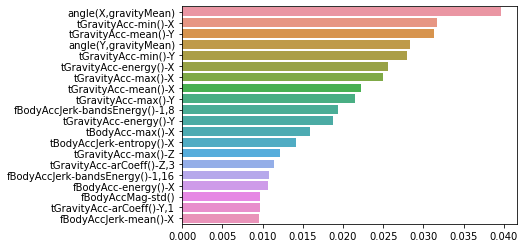

In [13]:
sns.barplot(x=top20, y=top20.index)
plt.show()